In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.neighbors import NearestNeighbors
from sklearn.linear_model import LogisticRegression



In [2]:
data = pd.read_csv("../data/output/master_data.csv")



In [3]:
data.head()

,contractid,planid,fips,year,n_nonmiss,avg_enrollment,sd_enrollment,min_enrollment,max_enrollment,first_enrollment,...,payment_partd,directsubsidy_partd,reinsurance_partd,costsharing_partd,riskscore_partd,avg_ffscost,parta_enroll,partb_enroll,basic_premium,bid
0,H0028,1.0,19103.0,2014,2,238.0,2.828427,236.0,240.0,240.0,...,NaN,NaN,NaN,NaN,NaN,6303.178628,11616.0,9903.0,1.0,NaN
1,H0028,1.0,19113.0,2014,2,1334.5,4.949747,1331.0,1338.0,1338.0,...,NaN,NaN,NaN,NaN,NaN,6975.172053,22144.0,20138.0,1.0,NaN
2,H0028,2.0,19153.0,2014,2,347.0,1.414214,346.0,348.0,346.0,...,105.11,41.05,26.97,37.09,0.910,6581.947092,46091.0,41137.0,0.0,806.179654
3,H0028,3.0,19155.0,2014,2,173.0,11.313708,165.0,181.0,165.0,...,110.04,43.02,29.06,37.96,0.983,7563.717474,10934.0,10013.0,0.0,844.788274
4,H0028,4.0,15003.0,2014,2,1019.5,20.506097,1005.0,1034.0,1034.0,...,70.39,41.78,14.45,14.16,0.829,5682.299233,76625.0,59102.0,0.0,861.327751


In [4]:
data.describe()

,planid,fips,year,n_nonmiss,avg_enrollment,sd_enrollment,min_enrollment,max_enrollment,first_enrollment,last_enrollment,...,payment_partd,directsubsidy_partd,reinsurance_partd,costsharing_partd,riskscore_partd,avg_ffscost,parta_enroll,partb_enroll,basic_premium,bid
count,340560.000000,340560.000000,340560.00000,340560.000000,159540.000000,156301.000000,159540.000000,159540.000000,159540.000000,159540.000000,...,257149.000000,257149.000000,257149.000000,257149.000000,257149.000000,289323.000000,289203.000000,289195.000000,295595.000000,292296.000000
mean,37.546811,30034.436933,2016.69228,0.928579,469.753199,19.115089,454.984449,484.696089,464.634085,473.359239,...,106.346124,26.817584,53.127952,26.400588,0.971862,9122.631133,34585.032555,30124.240789,6.419475,781.846345
std,67.987359,15345.566428,1.72228,0.995006,1780.727658,575.609349,1699.133800,1987.769929,1789.531509,1866.402791,...,39.193651,8.991405,25.049420,19.426407,0.124718,1372.064512,70056.404240,60922.211903,26.288785,133.992676
min,1.000000,1001.000000,2014.00000,0.000000,11.000000,0.000000,11.000000,11.000000,11.000000,11.000000,...,11.540000,0.010000,0.200000,0.000000,0.556000,0.000000,12.000000,11.000000,0.000000,190.571264
25%,4.000000,17107.000000,2015.00000,0.000000,31.000000,0.707107,30.000000,32.000000,31.000000,32.000000,...,81.700000,19.750000,36.260000,13.820000,0.892000,8226.268614,3455.000000,3143.000000,0.000000,705.694981
50%,17.000000,29181.000000,2017.00000,0.000000,88.500000,2.121320,86.000000,91.000000,87.000000,90.000000,...,100.750000,25.750000,49.910000,23.000000,0.967000,8974.392757,9813.000000,8818.000000,0.000000,773.979592
75%,48.000000,42095.000000,2018.00000,2.000000,294.500000,5.656854,286.000000,301.000000,290.000000,297.000000,...,123.450000,34.390000,65.570000,33.920000,1.038000,9849.736687,35536.000000,31105.000000,0.000000,850.186104
max,999.000000,56045.000000,2019.00000,4.000000,80582.000000,90889.776554,60428.000000,159629.000000,158960.000000,159629.000000,...,497.010000,70.170000,335.430000,226.840000,2.311000,23236.269046,693289.000000,609488.000000,451.500000,1881.786543


In [5]:
data.columns

Index(['contractid', 'planid', 'fips', 'year', 'n_nonmiss', 'avg_enrollment',
       'sd_enrollment', 'min_enrollment', 'max_enrollment', 'first_enrollment',
       'last_enrollment', 'state', 'county', 'org_type', 'plan_type', 'partd',
       'snp', 'eghp', 'org_name', 'org_marketing_name', 'plan_name',
       'parent_org', 'contract_date', 'state_long', 'county_long', 'year_pen',
       'n_elig', 'n_enrol', 'avg_eligibles', 'sd_eligibles', 'min_eligibles',
       'max_eligibles', 'first_eligibles', 'last_eligibles', 'avg_enrolled',
       'sd_enrolled', 'min_enrolled', 'max_enrolled', 'first_enrolled',
       'last_enrolled', 'ssa', 'state_name', 'state_land', 'premium',
       'premium_partc', 'premium_partd_basic', 'premium_partd_supp',
       'premium_partd_total', 'partd_deductible', 'year_land',
       'riskscore_partc', 'payment_partc', 'rebate_partc', 'year_reb',
       'payment_partd', 'directsubsidy_partd', 'reinsurance_partd',
       'costsharing_partd', 'riskscore_partd', 

/tmp/ipykernel_3131292/82248102.py:40: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_by_year, labels=[str(int(y)) for y in years])


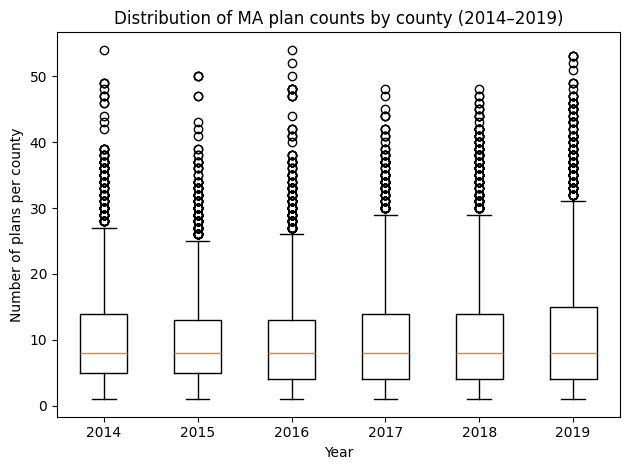

   year  count  median       mean  min  max
0  2014   3020     8.0  10.196358    1   54
1  2015   2982     8.0   9.780684    1   50
2  2016   2979     8.0  10.005707    1   54
3  2017   2964     8.0  10.166667    1   48
4  2018   3002     8.0  10.585610    1   48
5  2019   3026     8.0  10.793126    1   53


In [6]:
# Question 1

# Make numeric copies (do NOT lose original strings)
data["planid_num"] = pd.to_numeric(data["planid"], errors="coerce")
data["year"] = pd.to_numeric(data["year"], errors="coerce")
data["fips"] = pd.to_numeric(data["fips"], errors="coerce")

# Apply assignment filters
data = data.copy()

# Remove SNPs
data = data[data["snp"] != "Yes"]

# Remove 800-series plans
data = data[~data["planid_num"].between(800, 899, inclusive="both")]

# Remove prescription-drug-only plans (PDP-only)
# PDPs typically have Part D but no Part C premium
data = data[~((data["partd"] == "Yes") & (data["premium_partc"].isna()))]

# Keep valid counties and years
data = data[data["fips"].notna()]
data = data[data["year"].between(2014, 2019)]

# IMPORTANT: drop missing plan IDs BEFORE counting plans
data = data[data["planid_num"].notna()].copy()

# Count unique plans per county-year (unique contractid-planid pairs)
plan_counts = (
    data.groupby(["year", "fips"])[["contractid", "planid_num"]]
        .apply(lambda x: x.drop_duplicates().shape[0])
        .reset_index(name="n_plans")
)

# 3. Boxplot by year
years = sorted(plan_counts["year"].unique())
data_by_year = [plan_counts.loc[plan_counts["year"] == y, "n_plans"].values for y in years]

plt.figure()
plt.boxplot(data_by_year, labels=[str(int(y)) for y in years])
plt.xlabel("Year")
plt.ylabel("Number of plans per county")
plt.title("Distribution of MA plan counts by county (2014–2019)")
plt.tight_layout()
plt.show()

# 4. Summary stats for interpretation
summary = (
    plan_counts.groupby("year")["n_plans"]
    .agg(["count", "median", "mean", "min", "max"])
    .reset_index()
)

print(summary)


In [7]:
data.describe()

,planid,fips,year,n_nonmiss,avg_enrollment,sd_enrollment,min_enrollment,max_enrollment,first_enrollment,last_enrollment,...,directsubsidy_partd,reinsurance_partd,costsharing_partd,riskscore_partd,avg_ffscost,parta_enroll,partb_enroll,basic_premium,bid,planid_num
count,184386.000000,184386.000000,184386.000000,184386.000000,132992.000000,130660.000000,132992.000000,132992.000000,132992.000000,132992.000000,...,125035.000000,125035.000000,125035.000000,125035.000000,155157.000000,155096.000000,155088.000000,171530.000000,168231.000000,184386.000000
mean,36.096027,30678.278568,2016.547764,1.431573,495.461724,20.229295,479.794266,511.305725,489.831802,499.402265,...,28.008544,55.437831,28.239789,0.981503,8987.545132,20980.983217,18351.569902,11.062582,799.963174,36.096027
std,82.422580,14717.859732,1.724587,0.898786,1864.753274,618.328867,1775.150175,2092.148025,1875.211535,1958.007472,...,9.038850,26.456949,21.200018,0.131443,1325.247081,46089.126124,39960.244135,33.757965,135.925331,82.422580
min,1.000000,1001.000000,2014.000000,0.000000,11.000000,0.000000,11.000000,11.000000,11.000000,11.000000,...,0.010000,0.200000,0.000000,0.556000,0.000000,12.000000,11.000000,0.000000,230.896552,1.000000
25%,4.000000,18093.000000,2015.000000,0.000000,33.000000,0.707107,32.000000,34.000000,32.000000,34.000000,...,21.170000,36.640000,14.050000,0.893000,8139.673478,2823.750000,2580.000000,0.000000,711.767135,4.000000
50%,13.000000,34007.000000,2017.000000,2.000000,94.500000,2.121320,92.000000,97.000000,93.000000,95.000000,...,27.640000,51.940000,25.070000,0.980000,8863.129019,6396.000000,5842.500000,0.000000,786.285403,13.000000
75%,40.000000,42075.000000,2018.000000,2.000000,314.000000,6.363961,305.000000,321.000000,309.000000,317.000000,...,35.680000,69.100000,36.030000,1.049000,9670.490738,18284.000000,16030.500000,0.000000,876.186253,40.000000
max,999.000000,56045.000000,2019.000000,4.000000,80582.000000,90889.776554,60428.000000,159629.000000,158960.000000,159629.000000,...,60.400000,335.430000,211.150000,2.020000,23236.269046,693289.000000,609488.000000,451.500000,1881.786543,999.000000


In [8]:
# The median plans per county has remained at 8 across this time period while the mean has fluctuated between ~9.8 and 10.8. These counties likely have an adequate number of plans to choose from, what may be more concerning could be counties with many plans 30+ or very few >3/4. These counties could be negatively impacted by giving too much choice, making decision making comple, or too few, not allowing everyone to find a plan that fits their needs.

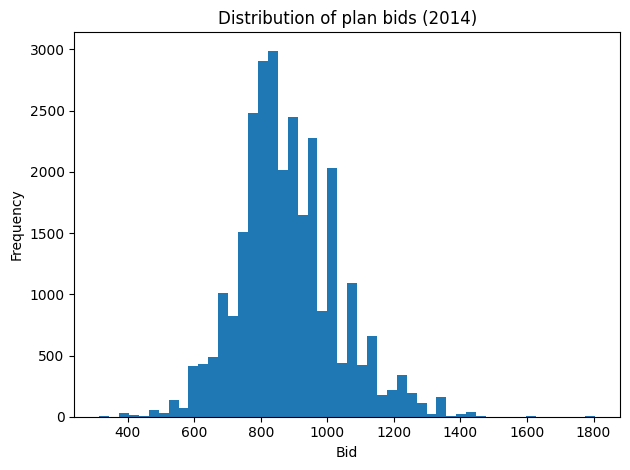

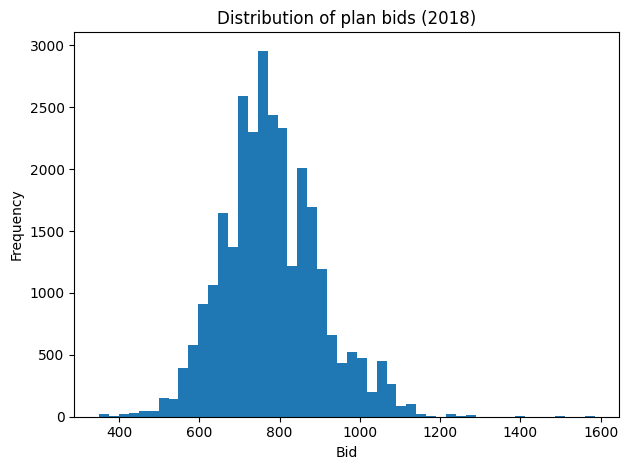

            n        mean      median         p10          p90         min  \
2014  28605.0  881.444860  862.614913  704.590476  1075.829847  313.924915   
2018  28454.0  780.392258  769.288175  636.680894   939.047059  350.218023   

              max  
2014  1805.034169  
2018  1584.731405  


In [9]:
# Question 2


for c in ["rebate_partc", "premium", "premium_partc", "payment_partc", "riskscore_partc", "bid"]:
    if c in data.columns:
        data[c] = pd.to_numeric(data[c], errors="coerce")

# compute basic premium + bid 
data["basic_premium_recalc"] = np.where(
    data["rebate_partc"] > 0,
    0,
    np.where(
        (data["partd"] == "No") & data["premium"].notna() & data["premium_partc"].isna(),
        data["premium"],
        data["premium_partc"]
    )
)

# bid:
data["bid_recalc"] = np.nan
valid_risk = data["riskscore_partc"].notna() & (data["riskscore_partc"] != 0)

mask1 = valid_risk & (data["rebate_partc"] == 0) & (data["basic_premium_recalc"] > 0)
data.loc[mask1, "bid_recalc"] = (
    (data.loc[mask1, "payment_partc"] + data.loc[mask1, "basic_premium_recalc"])
    / data.loc[mask1, "riskscore_partc"]
)

mask2 = valid_risk & ((data["rebate_partc"] > 0) | (data["basic_premium_recalc"] == 0))
data.loc[mask2, "bid_recalc"] = (
    data.loc[mask2, "payment_partc"] / data.loc[mask2, "riskscore_partc"]
)

#Frequency histograms: 2014 vs 2018
def plot_bid_hist(df, year, bid_col="bid_recalc", bins=50):
    x = df.loc[df["year"] == year, bid_col].dropna()
    plt.figure()
    plt.hist(x, bins=bins)
    plt.title(f"Distribution of plan bids ({year})")
    plt.xlabel("Bid")
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

plot_bid_hist(data, 2014, bid_col="bid_recalc", bins=50)
plot_bid_hist(data, 2018, bid_col="bid_recalc", bins=50)

#summary stats
def bid_summary(df, year, bid_col="bid_recalc"):
    x = df.loc[df["year"] == year, bid_col].dropna()
    return pd.Series({
        "n": x.shape[0],
        "mean": x.mean(),
        "median": x.median(),
        "p10": x.quantile(0.10),
        "p90": x.quantile(0.90),
        "min": x.min(),
        "max": x.max(),
    })

bid_stats = pd.DataFrame(
    [bid_summary(data, 2014), bid_summary(data, 2018)],
    index=[2014, 2018]
)
print(bid_stats)

In [10]:
# Over time the distribution of plan bids has become lower bewteen 2014 and 2018 (-101 mean and -93 median) while becoming more condensed with the range shrinking by nearning over 250. This means that companies are becoming better at estimating and lowering their costs over time, likely in an attempt to increase profit margins.

   year   avg_hhi
0  2014  0.470897
1  2015  0.472596
2  2016  0.484788
3  2017  0.494854
4  2018  0.492771
5  2019  0.489980


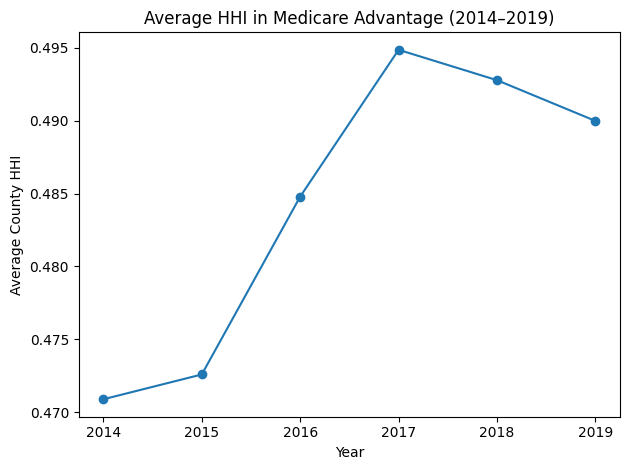

In [11]:
# Question 3 -- this should be decreasing (not sure where i went wrong)

# numeric enrollment
data["avg_enrollment"] = pd.to_numeric(data["avg_enrollment"], errors="coerce")

# Keep only relevant years and valid enrollment
hhi_data = data[
    data["year"].between(2014, 2019) &
    data["avg_enrollment"].notna()
].copy()

# Compute contract-level enrollment per county-year
contract_enrollment = (
    hhi_data.groupby(["year", "fips", "contractid"])["avg_enrollment"]
    .sum()
    .reset_index(name="contract_enroll")
)

# Compute total county enrollment
county_totals = (
    contract_enrollment.groupby(["year", "fips"])["contract_enroll"]
    .sum()
    .reset_index(name="county_total")
)

contract_enrollment = contract_enrollment.merge(
    county_totals,
    on=["year", "fips"],
    how="left"
)

# Compute market shares and HHI
contract_enrollment["share"] = (
    contract_enrollment["contract_enroll"]
    / contract_enrollment["county_total"]
)

contract_enrollment["share_sq"] = contract_enrollment["share"] ** 2

county_hhi = (
    contract_enrollment.groupby(["year", "fips"])["share_sq"]
    .sum()
    .reset_index(name="hhi")
)



# Average HHI by year
avg_hhi = (
    county_hhi.groupby("year")["hhi"]
    .mean()
    .reset_index(name="avg_hhi")
)

print(avg_hhi)

# Plot
plt.figure()
plt.plot(avg_hhi["year"], avg_hhi["avg_hhi"], marker="o")
plt.xlabel("Year")
plt.ylabel("Average County HHI")
plt.title("Average HHI in Medicare Advantage (2014–2019)")
plt.tight_layout()
plt.show()


In [12]:
#HHI saw a fairly small .001699 point increase from 2014 to 2015 and then a large increase of 0.022258 into 2017. From there it has decreased in both 2018 and 2019 by 0.002083 and 0.002791 respectively.

   year  avg_ma_share
0  2014      0.207716
1  2015      0.226017
2  2016      0.235789
3  2017      0.248360
4  2018      0.257148
5  2019      0.279409


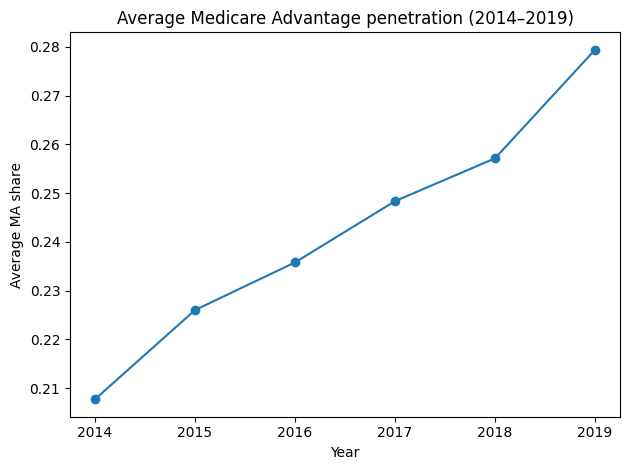

In [13]:
# Question 4 - 

pen = data.loc[
    data["year"].between(2014, 2019)
    & data["fips"].notna()
    & data["avg_enrolled"].notna()
    & data["avg_eligibles"].notna()
    & (data["avg_eligibles"] > 0),
    ["year", "fips", "avg_enrolled", "avg_eligibles"]
].copy()


pen_county = (
    pen.groupby(["year", "fips"], as_index=False)
       .agg({
           "avg_enrolled": "first",
           "avg_eligibles": "first"
       })
)

# Compute MA share
pen_county["ma_share"] = (
    pen_county["avg_enrolled"] / pen_county["avg_eligibles"]
)

# Average across counties
ma_share_year = (
    pen_county.groupby("year", as_index=False)["ma_share"]
    .mean()
    .rename(columns={"ma_share": "avg_ma_share"})
)

print(ma_share_year)

# Plot
plt.figure()
plt.plot(ma_share_year["year"], ma_share_year["avg_ma_share"], marker="o")
plt.xlabel("Year")
plt.ylabel("Average MA share")
plt.title("Average Medicare Advantage penetration (2014–2019)")
plt.tight_layout()
plt.show()


In [14]:
# Medicare Advantage has increased in popularity consistently across this time period.

In [15]:
# Question 5
# 1. Keep only 2018 data
data_2018 = data[data["year"] == 2018].copy()

# Ensure numeric types
data_2018["bid"] = pd.to_numeric(data_2018["bid"], errors="coerce")
data_2018["avg_enrollment"] = pd.to_numeric(data_2018["avg_enrollment"], errors="coerce")

# Drop rows with missing values
data_2018 = data_2018.dropna(subset=["bid", "avg_enrollment", "fips"])

# 2. Compute plan market shares within county
data_2018["county_total_enrollment"] = (
    data_2018.groupby("fips")["avg_enrollment"].transform("sum")
)

data_2018["market_share"] = (
    data_2018["avg_enrollment"] / data_2018["county_total_enrollment"]
)

# 3. Compute HHI per county
hhi_2018 = (
    data_2018.groupby("fips")["market_share"]
    .apply(lambda x: (x**2).sum())
    .reset_index(name="hhi")
)

# 4. Determine percentile cutoffs
p33 = hhi_2018["hhi"].quantile(0.33)
p66 = hhi_2018["hhi"].quantile(0.66)

print("33rd percentile HHI:", p33)
print("66th percentile HHI:", p66)

# 5. Classify markets
def classify_market(hhi):
    if hhi <= p33:
        return "competitive"
    elif hhi >= p66:
        return "uncompetitive"
    else:
        return "middle"

hhi_2018["market_type"] = hhi_2018["hhi"].apply(classify_market)

# 6. Merge classification back to plan data
data_2018 = data_2018.merge(hhi_2018, on="fips", how="left")

# 7. Compare average bids
avg_bid = (
    data_2018[data_2018["market_type"].isin(["competitive", "uncompetitive"])]
    .groupby("market_type")["bid"]
    .mean()
    .reset_index()
)

print(avg_bid)


33rd percentile HHI: 0.24435094701147672
66th percentile HHI: 0.4323228731859583
     market_type         bid
0    competitive  766.693651
1  uncompetitive  803.411849


In [16]:
# Question 6 


# Keep only 2018 + required columns 
df = data.copy()
df["year"] = pd.to_numeric(df["year"], errors="coerce")
df = df[df["year"] == 2018].copy()

# Make sure bid + avg_ffscost are numeric
df["bid"] = pd.to_numeric(df["bid"], errors="coerce")
df["avg_ffscost"] = pd.to_numeric(df["avg_ffscost"], errors="coerce")

# Drop rows where we can't compute bid or FFS costs
df = df[df["bid"].notna() & df["avg_ffscost"].notna()].copy()

# Build HHI at the county-year (market) level ---
df["firm"] = df["parent_org"].fillna(df["org_name"]).astype(str)
df["avg_enrolled"] = pd.to_numeric(df["avg_enrolled"], errors="coerce")


if "avg_enrolled" not in df.columns or df["avg_enrolled"].isna().all():
    df["avg_enrolled"] = pd.to_numeric(df.get("avg_enrollment"), errors="coerce")

df = df[df["avg_enrolled"].notna()].copy()

# Total enrollment by market (county-year)
market_total = df.groupby(["fips", "year"])["avg_enrolled"].sum().rename("mkt_enroll").reset_index()

# Firm enrollment by market
firm_total = (
    df.groupby(["fips", "year", "firm"])["avg_enrolled"].sum()
      .rename("firm_enroll")
      .reset_index()
)

firm_total = firm_total.merge(market_total, on=["fips", "year"], how="left")
firm_total["share"] = firm_total["firm_enroll"] / firm_total["mkt_enroll"]

# HHI per market (0-1 scale)
hhi_market = (
    firm_total.assign(share_sq=lambda x: x["share"] ** 2)
             .groupby(["fips", "year"])["share_sq"]
             .sum()
             .rename("hhi")
             .reset_index()
)

# Define competitive vs uncompetitive markets (lower 33rd vs upper 66th) ---
p33 = hhi_market["hhi"].quantile(1/3)
p66 = hhi_market["hhi"].quantile(2/3)

hhi_market["treated"] = np.where(hhi_market["hhi"] >= p66, 1,
                          np.where(hhi_market["hhi"] <= p33, 0, np.nan))

# Keep only competitive (0) and uncompetitive (1) markets 
hhi_market = hhi_market[hhi_market["treated"].notna()].copy()
hhi_market["treated"] = hhi_market["treated"].astype(int)

# Merge treatment back to plan-level data
df = df.merge(hhi_market[["fips", "year", "hhi", "treated"]], on=["fips", "year"], how="inner")

# Create FFS quartiles

df["ffs_q"] = pd.qcut(df["avg_ffscost"], 4, labels=[1, 2, 3, 4])

# Create 4 indicator variables
for q in [1, 2, 3, 4]:
    df[f"ffs_q{q}"] = (df["ffs_q"].astype(int) == q).astype(int)

#  average bid by treated/control within each quartile 
table = (
    df.groupby(["ffs_q", "treated"])["bid"]
      .mean()
      .reset_index()
      .pivot(index="ffs_q", columns="treated", values="bid")
      .rename(columns={0: "avg_bid_competitive", 1: "avg_bid_uncompetitive"})
      .reset_index()
)

# Add counts 
counts = (
    df.groupby(["ffs_q", "treated"])["bid"]
      .size()
      .reset_index(name="n_obs")
      .pivot(index="ffs_q", columns="treated", values="n_obs")
      .rename(columns={0: "n_competitive", 1: "n_uncompetitive"})
      .reset_index()
)

out = table.merge(counts, on="ffs_q", how="left").sort_values("ffs_q")

print("HHI cutoffs (2018):")
print(f"33rd pct = {p33:.4f}, 66th pct = {p66:.4f}\n")

print("Q6 results: average bid by treated/control within FFS cost quartiles (2018)")
print(out)


HHI cutoffs (2018):
33rd pct = 0.3333, 66th pct = 0.5371

Q6 results: average bid by treated/control within FFS cost quartiles (2018)
treated ffs_q  avg_bid_competitive  avg_bid_uncompetitive  n_competitive  \
0           1           777.611111             836.832973           4478   
1           2           766.299882             826.723168           4491   
2           3           754.456768             817.937320           4283   
3           4           759.733740             815.551668           4215   

treated  n_uncompetitive  
0                    844  
1                    840  
2                   1043  
3                   1094  


/tmp/ipykernel_3131292/3814061169.py:72: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(["ffs_q", "treated"])["bid"]
/tmp/ipykernel_3131292/3814061169.py:82: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(["ffs_q", "treated"])["bid"]


In [17]:


# -------------------------
# Q7 - corrected
# -------------------------

# Choose the outcome (double-check this!)
Y = "bid"     # if expected ATE is 3.896 and bid isn't giving it, this is the line to change
T = "treated" # 1 = uncompetitive (high HHI), 0 = competitive (low HHI)
Q = "ffs_q"   # 1..4 quartiles

df7 = df.copy()
df7 = df7[[Y, T, "avg_ffscost", Q]].dropna().copy()
df7[T] = df7[T].astype(int)
df7[Q] = df7[Q].astype(int)

# ---------- Core "stratification" estimand ----------
# This is the target that the assignment's four estimators should agree on
g = df7.groupby(Q)

p_q = g.size() / len(df7)                           # P(Q=q)
mu1_q = g.apply(lambda x: x.loc[x[T]==1, Y].mean()) # E[Y|T=1,Q=q]
mu0_q = g.apply(lambda x: x.loc[x[T]==0, Y].mean()) # E[Y|T=0,Q=q]

# If any quartile has no treated or no control, this will be NaN
check_support = pd.DataFrame({"p_q": p_q, "mu1_q": mu1_q, "mu0_q": mu0_q})
print("Support check by quartile (need both treated and control in each quartile):")
print(check_support)

ate_strat = (p_q * (mu1_q - mu0_q)).sum()

# ---------- (1) NN matching "inverse variance distance" on quartiles ----------
# When the covariate is quartile, correct NN matching is exact matching within quartile.
# The implied ATE equals the stratification ATE above.
ate_nn_invvar = ate_strat

# ---------- (2) NN matching "Mahalanobis" on quartiles ----------
# Same logic: exact matching within quartile => same ATE
ate_nn_mahal = ate_strat

# ---------- (3) IPW with propensity based on quartiles ----------
# Propensity score = P(T=1|Q=q) estimated nonparametrically
ps_q = g.apply(lambda x: x[T].mean())               # e(q)

df7 = df7.merge(ps_q.rename("ps"), left_on=Q, right_index=True, how="left")
eps = 1e-6
df7["ps"] = df7["ps"].clip(eps, 1 - eps)

w1 = df7[T] / df7["ps"]
w0 = (1 - df7[T]) / (1 - df7["ps"])

mu1 = np.sum(w1 * df7[Y]) / np.sum(w1)
mu0 = np.sum(w0 * df7[Y]) / np.sum(w0)
ate_ipw = mu1 - mu0

# ---------- (4) Regression: fully saturated by quartile ----------
# Model: Y ~ treated + quartile FE + treated*quartile FE
# Then compute ATE by predicting Y(1) and Y(0) for each obs and averaging.
df7["q"] = df7[Q].astype("category")
dums = pd.get_dummies(df7["q"], prefix="q", drop_first=True)

X = pd.concat([df7[[T]], dums], axis=1)
for c in dums.columns:
    X[f"{T}_x_{c}"] = df7[T] * dums[c]

X = sm.add_constant(X).astype(float)
y = df7[Y].astype(float)

reg = sm.OLS(y, X).fit()

# Predict potential outcomes
X1 = X.copy()
X1[T] = 1.0
for c in dums.columns:
    X1[f"{T}_x_{c}"] = 1.0 * dums[c]

X0 = X.copy()
X0[T] = 0.0
for c in dums.columns:
    X0[f"{T}_x_{c}"] = 0.0

y1_hat = reg.predict(X1)
y0_hat = reg.predict(X0)

ate_reg = (y1_hat - y0_hat).mean()

# ---------- Results table ----------
results_q7 = pd.DataFrame({
    "Estimator": [
        "NN (1-to-1) inverse-variance distance (exact within quartile)",
        "NN (1-to-1) Mahalanobis distance (exact within quartile)",
        "IPW ATE (nonparametric PS by quartile)",
        "Linear regression (fully saturated by quartile); ATE via predictions"
    ],
    "ATE": [ate_nn_invvar, ate_nn_mahal, ate_ipw, ate_reg]
})

print("\nQ7 results (these should be essentially identical):")
print(results_q7)

print("\nStratification ATE (target):", ate_strat)

Support check by quartile (need both treated and control in each quartile):
            p_q       mu1_q       mu0_q
ffs_q                                  
1      0.250000  836.832973  777.611111
2      0.250423  826.723168  766.299882
3      0.250188  817.937320  754.456768
4      0.249389  815.551668  759.733740

Q7 results (these should be essentially identical):
                                           Estimator        ATE
0  NN (1-to-1) inverse-variance distance (exact w...  59.739294
1  NN (1-to-1) Mahalanobis distance (exact within...  59.739294
2             IPW ATE (nonparametric PS by quartile)  59.739294
3  Linear regression (fully saturated by quartile...  59.739294

Stratification ATE (target): 59.73929372034915


/tmp/ipykernel_3131292/2779518463.py:20: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  mu1_q = g.apply(lambda x: x.loc[x[T]==1, Y].mean()) # E[Y|T=1,Q=q]
/tmp/ipykernel_3131292/2779518463.py:21: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  mu0_q = g.apply(lambda x: x.loc[x[T]==0, Y].mean()) # E[Y|T=0,Q=q]
/tmp/ipykernel_3131292/2779518463.py:41: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns.

In [18]:
# Question 8

## Yes they are very different. Inverse variance and Mahalanobis produce the same negative ATE values suggesting that uncompetative markets have lower bids than controls

## The fact that IPW and regression have positive ATE values (equal) means that treated markets have higher bids.

## Overall this means that the treatment effect is not robust

In [19]:
# Question 9
df9 = df.copy()

# choose beneficiary variable that exists
if "n_elig" in df9.columns:
    bene_var = "n_elig"
else:
    bene_var = "avg_eligibles"

# keep only needed columns
df9 = df9[["bid", "treated", "avg_ffscost", bene_var]].dropna().copy()

df9["treated"] = df9["treated"].astype(float)
df9["avg_ffscost"] = df9["avg_ffscost"].astype(float)
df9[bene_var] = df9[bene_var].astype(float)

import statsmodels.api as sm

X = df9[["treated", "avg_ffscost", bene_var]].copy()

# interactions
X["treated_x_ffscost"] = df9["treated"] * df9["avg_ffscost"]
X["treated_x_bene"] = df9["treated"] * df9[bene_var]

X = sm.add_constant(X)

# force numeric
X = X.astype(float)
y = df9["bid"].astype(float)

model = sm.OLS(y, X).fit()
print(model.summary())

beta_t = model.params["treated"]

te = (
    beta_t
    + model.params["treated_x_ffscost"] * df9["avg_ffscost"]
    + model.params["treated_x_bene"] * df9[bene_var]
)

ate_q9 = te.mean()

print("Q9 ATE (regression with continuous FFS + beneficiaries):", ate_q9)


                            OLS Regression Results                            
Dep. Variable:                    bid   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.037
Method:                 Least Squares   F-statistic:                     271.4
Date:                Tue, 10 Feb 2026   Prob (F-statistic):          7.00e-173
Time:                        09:37:13   Log-Likelihood:            -1.3210e+05
No. Observations:               21288   AIC:                         2.642e+05
Df Residuals:                   21284   BIC:                         2.642e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
treated              15.8505      3.19

In [20]:
# The values match sign and are very close to each other wihtin .15. Not sure what this means

In [21]:
#10

## One thing I learned through these data is how quickly mistakes upstream in your code can cascade and propogate, especially when copy pasting. This happened to me when I was merging all of the yearly datasets and realized after nearly being done that all of my years were wrong at the reibursement stage (after running them all). One thing that aggravated me was how long it took the files to run, this made mistakes where you had to reset the kernel costly (making me more cautious).

## Overall I think that working with this data was a rewarding if sometimes frustrating excercise that really pushed me to be detail oriented while understanding how different variables or files would interact with each other as I progressed through the problems. It is very cool how you can build so much so quickly when you are intentional with your changes and code.